In [25]:
import numpy as np
import pandas as pd
import os
import sys
import project_functions as p

df1 = p.load_and_process('../../data/raw/twitchdataset.csv')
df1

Ranking,Stream Name,Watch Time (Hours),Stream Time (Hours),Viewers (Peak),Viewers (Average),Followers (Total),Followers (Gained),Viewers (Gained),Partnered,Audience Type (Mature),Language,Primary Game,Secondary Game,Tertiary Game
1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,Just Chatting,Among Us,Overwatch
2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,Counter-Strike: Global Offensive,nan,nan
5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
6,Fextralife,3644124975,161595,68795,19768,533400,437036,684835748,True,False,English,VALORANT,The Elder Scrolls Online,Genshin Impact
7,loltyler1,3503191680,131115,105499,25985,3719080,1066209,59364698,True,False,English,League of Legends,The Last of Us Part II,Halo: The Master Chief Collection
8,Rubius,3278317200,63285,240096,49771,6579492,4309441,74460362,True,False,Spanish,Minecraft,Just Chatting,Grand Theft Auto V
9,Tfue,3276339360,130680,190173,25269,9184421,2023733,70427346,True,False,English,Fortnite,Call Of Duty: Modern Warfare,Among Us
10,auronplay,3268219170,47385,191742,64477,5053692,4681567,57146179,True,False,Spanish,Grand Theft Auto V,Minecraft,Among Us


In [26]:
df2 = p.test('../../data/raw/twitchdataset.csv')
df8 = (
    pd.DataFrame(df2).rename(columns={"first category":"game"})
    .rename(columns={"second category":"game2"})
    .rename(columns={"third category":"game3"})
)
df8

,screen name,game,game2,game3
0,xQcOW,Just Chatting,Among Us,Overwatch
1,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection
...,...,...,...,...
8795,MARCUSakaAPOSTLE,Spellbreak,Rogue Company,Apex Legends
8796,MIMISHKA_MEOW,Overwatch,Just Chatting,Apex Legends
8797,MySteam,Dota 2,Just Chatting,Fall Guys: Ultimate Knockout
8798,Iker_Guide,Paladins,League of Legends,SMITE


In [60]:
# Get the count of each value
value_counts = df8['game'].value_counts()

# Select the values where the count is less than 142
to_remove = value_counts[value_counts <= 142].index

# Keep rows where the game column is not in to_remove
df9 = df8[~df8.game.isin(to_remove)] 
df10 = df9['game'].value_counts()
df10

Just Chatting                       1365
League of Legends                    712
Grand Theft Auto V                   578
Fortnite                             463
Call Of Duty: Modern Warfare         345
Counter-Strike: Global Offensive     247
World of Warcraft                    246
VALORANT                             241
Dota 2                               213
Escape From Tarkov                   208
FIFA 20                              198
Minecraft                            191
Hearthstone                          163
Apex Legends                         156
Dead by Daylight                     145
Name: game, dtype: int64

In [61]:
# Get the count of each value
value_counts1 = df8['game2'].value_counts()

# Select the values where the count is less than 100
to_remove1 = value_counts1[value_counts1 <= 100].index

# Keep rows where the game2 column is not in to_remove
df11 = df8[~df8.game2.isin(to_remove1)] 
df12 = df11['game2'].value_counts()
df12

Just Chatting                       1264
VALORANT                             541
Call Of Duty: Modern Warfare         399
League of Legends                    348
Among Us                             307
Unlisted on Twitch                   237
Counter-Strike: Global Offensive     218
Minecraft                            207
Grand Theft Auto V                   199
Fall Guys: Ultimate Knockout         184
Escape From Tarkov                   179
Fortnite                             149
FIFA 21                              113
Teamfight Tactics                    108
Animal Crossing: New Horizons        106
Name: game2, dtype: int64

In [62]:
# Get the count of each value
value_counts2 = df8['game3'].value_counts()

# Select the values where the count is less than 100
to_remove2 = value_counts2[value_counts2 <= 100].index

# Keep rows where the game3 column is not in to_remove
df13 = df8[~df8.game3.isin(to_remove2)] 
df14 = df13['game3'].value_counts()
df14

Just Chatting                       792
Among Us                            438
VALORANT                            424
Call Of Duty: Modern Warfare        373
Fall Guys: Ultimate Knockout        276
League of Legends                   271
Minecraft                           201
Counter-Strike: Global Offensive    198
Unlisted on Twitch                  185
Grand Theft Auto V                  152
Escape From Tarkov                  134
Animal Crossing: New Horizons       129
Fortnite                            118
Apex Legends                        111
Teamfight Tactics                   109
Name: game3, dtype: int64

<AxesSubplot:title={'center':'Primary Games Played the Most'}, xlabel='Games', ylabel='Occurances of Game Betweem Streamers'>

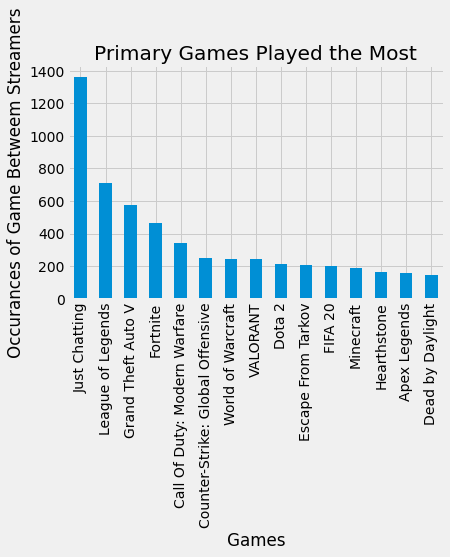

In [63]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('fivethirtyeight') 
df6 = (
    df10.plot.bar(x = "game", y = "value", rot = 90)
)
plt.title("Primary Games Played the Most")
plt.xlabel("Games")
plt.ylabel("Occurances of Game Betweem Streamers")
df6

<AxesSubplot:title={'center':'Secondary Games Played the Most'}, xlabel='Games', ylabel='Occurances of Game Between Streamers'>

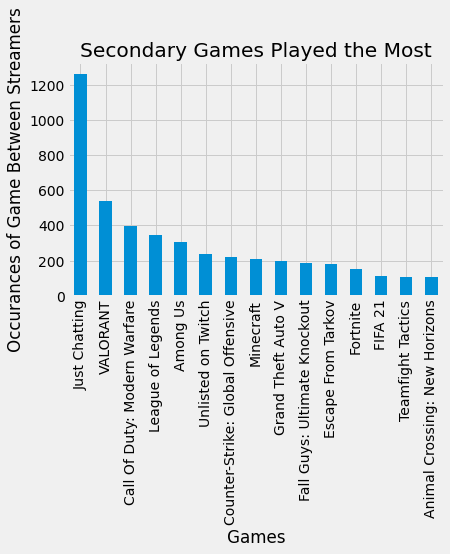

In [31]:
from matplotlib import pyplot as plt
matplotlib.style.use('fivethirtyeight') 
df7 = (
    df12.plot.bar(x = "game2", y = "value", rot = 90)
)
plt.title("Secondary Games Played the Most")
plt.xlabel("Games")
plt.ylabel("Occurances of Game Between Streamers")
df7

<AxesSubplot:title={'center':'Tertiary Games Played the Most'}, xlabel='Games', ylabel='Occurances of Game Between Streamers'>

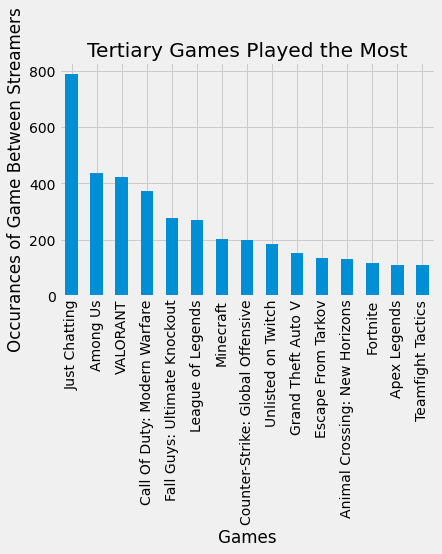

In [32]:
from matplotlib import pyplot as plt
matplotlib.style.use('fivethirtyeight') 
df15 = (
    df14.plot.bar(x = "game3", y = "value", rot = 90)
)
plt.title("Tertiary Games Played the Most")
plt.xlabel("Games")
plt.ylabel("Occurances of Game Between Streamers")
df15

In [108]:
value_counts3 = df8["game2"+['game2']+["game3"]].value_counts()
value_counts3

game                game2                  game3                           
Fortnite            Just Chatting          Among Us                            30
League of Legends   Just Chatting          Among Us                            25
                                           VALORANT                            24
Grand Theft Auto V  Just Chatting          Counter-Strike: Global Offensive    23
                                           League of Legends                   22
                                                                               ..
                    Red Dead Redemption 2  Satisfactory                         1
                                           SCUM                                 1
                                           Retro                                1
                                           PLAYERUNKNOWN                        1
osu!                Slots                  League of Legends                    1
Length: 6048, dtype: i

In [133]:
games = df10.head(15)
games1 = df12.head(15)
games2 = df14.head(15)
vertical_stack = pd.concat([games, games1, games2], axis=0)
df30 = vertical_stack.rename_axis('games').reset_index(name='counts')
df31 = df30.groupby(["games"]).counts.sum().reset_index()
df31

,games,counts
0,Among Us,745
1,Animal Crossing: New Horizons,235
2,Apex Legends,267
3,Call Of Duty: Modern Warfare,1117
4,Counter-Strike: Global Offensive,663
5,Dead by Daylight,145
6,Dota 2,213
7,Escape From Tarkov,521
8,FIFA 20,198
9,FIFA 21,113


<AxesSubplot:title={'center':'All Games Played the Most'}, xlabel='Games', ylabel='Occurances of Game Between Streamers'>

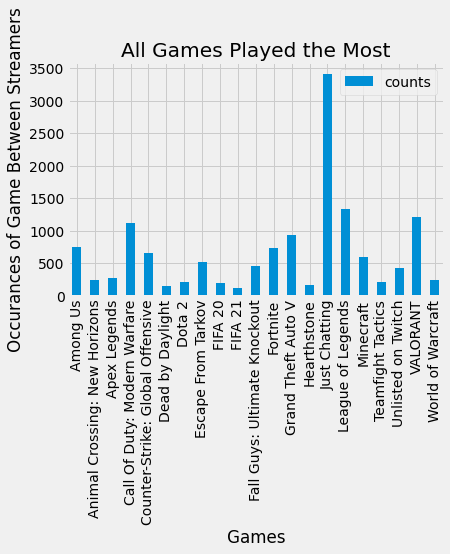

In [134]:
matplotlib.style.use('fivethirtyeight') 
df32 = (
    df31.plot.bar(x = "games", y = "counts", rot = 90)
)
plt.title("All Games Played the Most")
plt.xlabel("Games")
plt.ylabel("Occurances of Game Between Streamers")
df32